In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

In [2]:
# problem 1
list = [-3, -1, 1, 3, 5, 7]
a = 7 + (7-5)/(6-5) * (7-6)
a

9.0

In [3]:
# problem 2
file_name = 'processed.cleveland.data'
data = pd.read_csv('processed.cleveland.data', header=None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# data cleaning
# name columns
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
               'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
               'ca', 'thal', 'num']
# change num to binary: no presence = 0; presence = 1
data['num'] = data['num'].replace([1, 2, 3, 4], 1)
# is this balanced?
heart_disease_present = len(data[data.num == 1])/len(data)
heart_dss_not_present = len(data[data.num == 0])/len(data)

In [5]:
data_drop = data.dropna()
round(data_drop.describe(), 2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.46
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,0.50
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,1.00


In [6]:
mean_imputer = Imputer(missing_values = np.NaN, strategy = 'mean', axis = 0)
# Train the imputor on the df dataset
data = data.replace('?', np.nan)
mean_imputer = mean_imputer.fit(data)
data_mean = pd.DataFrame(mean_imputer.transform(data.values))
data_mean.columns = data_drop.columns
round(data_mean.describe(), 2)

/Users/skatta/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.67,4.73,0.46
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,0.93,1.93,0.50
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,1.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,1.00


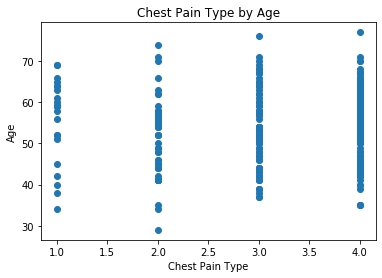

In [7]:
# I don't see a relationship...
scatter = plt.figure(0)
ax = scatter.add_subplot(111)
ax.scatter(data_mean['cp'], data_mean['age'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.title('Chest Pain Type by Age')
plt.savefig('scatter.png')

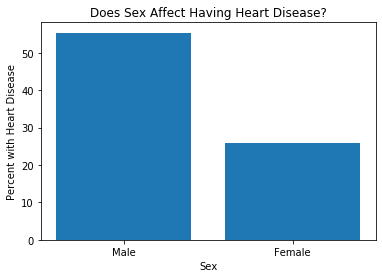

In [8]:
# bar plot
male_num_avg = np.average(data_mean[data_mean.sex == 1]['num']) * 100
feml_num_avg = np.average(data_mean[data_mean.sex == 0]['num']) * 100
bar = plt.figure(1)
ax1 = bar.add_subplot(111)
ax1.bar(['Male', 'Female'], [male_num_avg, feml_num_avg])
plt.title('Does Sex Affect Having Heart Disease?')
plt.xlabel('Sex')
plt.ylabel('Percent with Heart Disease')
plt.savefig('sex_plots.png')

In [9]:
# 6 random samples
samples = [
    data_mean.sample(n = 50, random_state = 1),
    data_mean.sample(n = 50, random_state = 2),
    data_mean.sample(n = 50, random_state = 3),
    data_mean.sample(n = 50, random_state = 4),
    data_mean.sample(n = 50, random_state = 5),
    data_mean.sample(n = 50, random_state = 6)
]
# are samples balanced?
balanced = []
for i in samples:
    heart_disease_present = len(i[i.num == 1])/len(i)
    heart_dss_not_present = len(i[i.num == 0])/len(i)
    balanced.append([heart_disease_present, heart_dss_not_present])
balanced = pd.DataFrame(balanced, columns = ['Heart Disease Present', 'Heart Disease Not Present'])
display(balanced)

,Heart Disease Present,Heart Disease Not Present
0,0.44,0.56
1,0.44,0.56
2,0.42,0.58
3,0.44,0.56
4,0.42,0.58
5,0.42,0.58


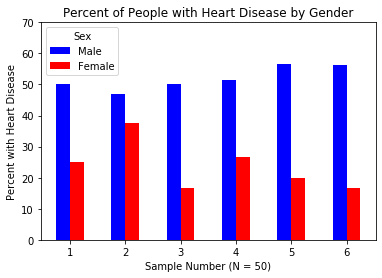

In [10]:
male_smpl = []
fml_smpl = []
for i in samples:
    male_smpl.append(np.average(i[i.sex == 1]['num']) * 100)
    fml_smpl.append(np.average(i[i.sex == 0]['num']) * 100)
smpl_means = pd.DataFrame(male_smpl, fml_smpl)
X = np.arange(1, 7)
smpl_plots = plt.figure(2)
ax = smpl_plots.add_subplot(111)
ax.bar(X - .125, male_smpl, color = 'b', width = 0.25)
ax.bar(X + .125, fml_smpl, color = 'r', width = 0.25)
ax.legend(['Male', 'Female'], loc = 2, title = 'Sex')
plt.xlabel('Sample Number (N = 50)')
plt.ylabel('Percent with Heart Disease')
plt.title('Percent of People with Heart Disease by Gender')
plt.ylim(0, 70)
plt.savefig('sample_plots.png')
plt.show()

3


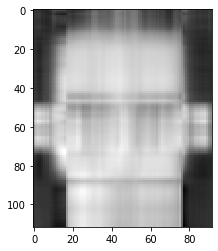

In [11]:
# Problem 4
img = plt.imread('/Users/skatta/Desktop/cis5523/hw2_2020_problem4_Face.png')
img = img/255
plt.imshow(img, cmap = 'gray')

pca_1 = PCA(1)
pca_1.fit(img)
components_1 = pca_1.transform(img)
projected_1 = pca_1.inverse_transform(components_1)
plt.imshow(projected_1.reshape(112, 92), cmap = 'gray')

pca_5 = PCA(5)
pca_5.fit(img)
components_5 = pca_5.transform(img)
projected_5 = pca_5.inverse_transform(components_5)
plt.imshow(projected_5.reshape(112, 92), cmap = 'gray')

pca_10 = PCA(10)
pca_10.fit(img)
components_10 = pca_10.transform(img)
projected_10 = pca_10.inverse_transform(components_10)
plt.imshow(projected_10.reshape(112, 92), cmap = 'gray')

pca_var_80 = PCA(.8)
pca_var_80.fit(img)
# need 3 PC for 80% variation
print(len(pca_var_80.components_))
components_var_80 = pca_var_80.transform(img)
projected_var_80 = pca_var_80.inverse_transform(components_var_80)
plt.imshow(projected_var_80.reshape(112, 92), cmap = 'gray')

In [12]:
# Problem 5
gym = pd.read_csv('hw4_2020_problem5_GymX.csv')
missing_vals = []
for i in gym:
    missing_vals.append([i, len(gym) - gym[i].count()])
# part a
missing_vals_df = pd.DataFrame(missing_vals, columns = ['Column Name', '# Missing Values'])
# part b: naive solution - remove rows with missing values - lost a bunch of data
gym_naive = gym.dropna()
# part c: better solution - regression imputation

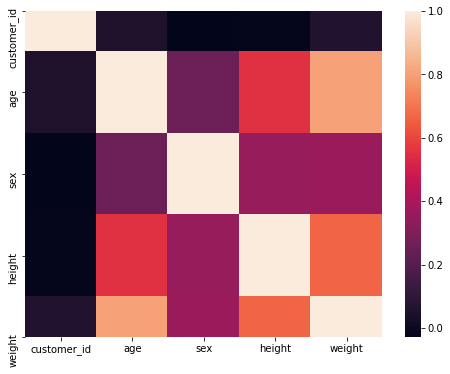

In [13]:
# correlation matrix of values
var_corr = gym_naive.corr()
plt.figure(4, figsize = (8, 6))
sns.heatmap(var_corr, xticklabels = var_corr.columns, yticklabels = var_corr.columns, annot = False)

In [14]:
# Evaluating Model Fit for imputation: heights
lm = linear_model.LinearRegression()
missing_naive = gym_naive[['age', 'sex', 'height', 'weight']]
x_height = missing_naive.drop('height', axis = 1)
y_height = pd.DataFrame(missing_naive['height'])
x_height_train, x_height_test, y_height_train, y_height_test = train_test_split(x_height, y_height, test_size = 0.3)
# impute values based on regression. like mean imputation but this allows for diff means based on demographics
# impute heights
height_test_model = lm.fit(x_height_train, y_height_train)
height_test_predicted = height_test_model.predict(x_height_test)
rms = sqrt(mean_squared_error(y_height_test, height_test_predicted))
print('RMSE for Height: ', rms)

RMSE for Height:  0.5831449521725367


In [15]:
# Evaluating Model Fit for imputation: Weights

x_weight = missing_naive.drop('weight', axis = 1)
y_weight = pd.DataFrame(missing_naive['weight'])
x_weight_train, x_weight_test, y_weight_train, y_weight_test = train_test_split(x_weight, y_weight, test_size = 0.3)
# impute values based on regression. like mean imputation but this allows for diff means based on demographics
# impute weights
weight_test_model = lm.fit(x_weight_train, y_weight_train)
weight_test_predicted = weight_test_model.predict(x_weight_test)
rms = sqrt(np.mean((y_weight_test - weight_test_predicted)**2))
print('RMSE: ', rms)

RMSE:  28.140619502043208


In [16]:
# drop na values for people who have at least 2 missing values - hard to impute
indexes_membership = gym[gym['membership_type'].isnull()].index
for i in indexes_membership:
    if gym['age'][i] < 13:
        gym.set_value(i, ['membership_type'], 'kids')
    elif gym['age'][i] < 18:
        gym.set_value(i, ['membership_type'], 'youth')
    else:
        gym.set_value(i, ['membership_type'], 'adults')
gym2 = gym.dropna(thresh = 6)

height_model = lm.fit(missing_naive.drop('height', axis = 1), missing_naive['height'])
print(height_model.coef_)
height_predict = height_model.predict(gym2[gym2['height'].isnull()][['age', 'sex', 'weight']])
indexes_height = gym2[gym2['height'].isnull()].index
for i in range(len(height_predict)):
    gym2.set_value(indexes_height[i], ['height'], np.float64(height_predict[i]))

# impute weights
weight_model = lm.fit(missing_naive.drop('weight', axis = 1), missing_naive['weight'])
print(weight_model.coef_)
weight_predict = weight_model.predict(gym2[gym2['weight'].isnull()][['age', 'sex', 'height']])
indexes_weight = gym2[gym2['weight'].isnull()].index
for i in range(len(weight_predict)):
    gym2.set_value(indexes_weight[i], ['weight'], np.float64(weight_predict[i]))


/Users/skatta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


[0.00322973 0.24414104 0.00791759]


/Users/skatta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/skatta/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


[ 1.90065861 13.94502402 19.80550666]


/Users/skatta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/skatta/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


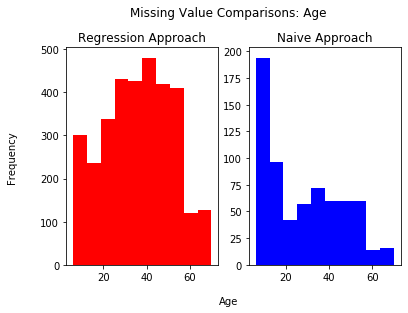

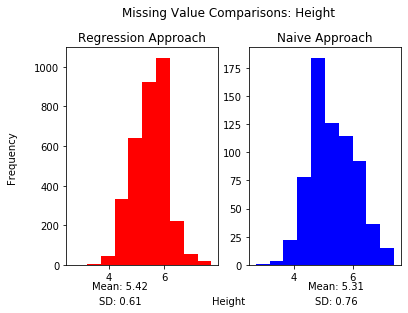

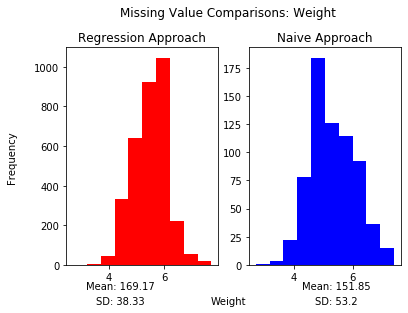

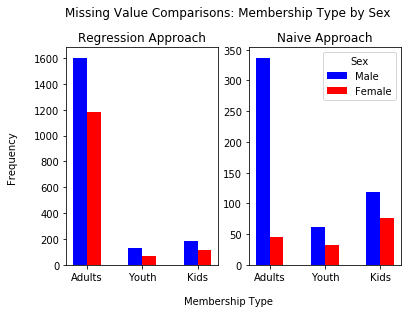

In [17]:
# plots comparing our naive and regression missing values handling methods

# Age - regression is much more centered while naive is skewed to the right
fig, axes = plt.subplots(1, 2)
fig.text(0.5, 0, 'Age', ha='center', va = 'center')
fig.text(0, 0.5, 'Frequency', ha='center', va = 'center', rotation = 'vertical')
fig.text(0.5, 1, 'Missing Value Comparisons: Age', ha='center', va = 'center', fontsize = 12)
axes[0].hist(gym2.age, color = 'r')
axes[1].hist(gym_naive.age, color = 'b')
axes[0].set_title('Regression Approach')
axes[1].set_title('Naive Approach')
plt.savefig('age.png', bbox_inches='tight')

# Height - about the same across both methods
fig, axes = plt.subplots(1, 2)
fig.text(0.5, 0, 'Height', ha='center', va = 'center')
fig.text(0, 0.5, 'Frequency', ha='center', va = 'center', rotation = 'vertical')
fig.text(0.5, 1, 'Missing Value Comparisons: Height', ha='center', va = 'center', fontsize = 12)
mean1 = ('Mean: ' + str(round(np.mean(gym2.height), 2)))
sd1 = ('SD: ' + str(round(np.std(gym2.height), 2)))
fig.text(0.25, 0.05, mean1, ha='center', va = 'center')
fig.text(0.25, 0.00, sd1, ha='center', va = 'center')
mean2 = ('Mean: ' + str(round(np.mean(gym_naive.height), 2)))
sd2 = ('SD: ' + str(round(np.std(gym_naive.height), 2)))
fig.text(0.75, 0.05, mean2, ha='center', va = 'center')
fig.text(0.75, 0.00, sd2, ha='center', va = 'center')
axes[0].hist(gym2.height, color = 'r')
axes[1].hist(gym_naive.height, color = 'b')
axes[0].set_title('Regression Approach')
axes[1].set_title('Naive Approach')
plt.savefig('height.png', bbox_inches='tight')

# Weight - regression has a tighter fit
fig, axes = plt.subplots(1, 2)
fig.text(0.5, 0, 'Weight', ha='center', va = 'center')
fig.text(0, 0.5, 'Frequency', ha='center', va = 'center', rotation = 'vertical')
fig.text(0.5, 1, 'Missing Value Comparisons: Weight', ha='center', va = 'center', fontsize = 12)
mean1 = ('Mean: ' + str(round(np.mean(gym2.weight), 2)))
sd1 = ('SD: ' + str(round(np.std(gym2.weight), 2)))
fig.text(0.25, 0.05, mean1, ha='center', va = 'center')
fig.text(0.25, 0.00, sd1, ha='center', va = 'center')
mean2 = ('Mean: ' + str(round(np.mean(gym_naive.weight), 2)))
sd2 = ('SD: ' + str(round(np.std(gym_naive.weight), 2)))
fig.text(0.75, 0.05, mean2, ha='center', va = 'center')
fig.text(0.75, 0.00, sd2, ha='center', va = 'center')
axes[0].hist(gym2.height, color = 'r')
axes[1].hist(gym_naive.height, color = 'b')
axes[0].set_title('Regression Approach')
axes[1].set_title('Naive Approach')
plt.savefig('weight.png', bbox_inches='tight')

# Frequency - membership type and sex
male_smpl1 = []
fml_smpl1 = []
male_smpl2 = []
fml_smpl2 = []
for i in ['adults', 'youth', 'kids']:
    male_smpl1.append(len(gym2.loc[(gym2.sex == 1) & (gym2.membership_type == i)]))
    male_smpl2.append(len(gym_naive.loc[(gym_naive.sex == 1) & (gym_naive.membership_type == i)]))
    fml_smpl1.append(len(gym2.loc[(gym2.sex == 0) & (gym2.membership_type == i)]))
    fml_smpl2.append(len(gym_naive.loc[(gym_naive.sex == 0) & (gym_naive.membership_type == i)]))
data = pd.DataFrame(male_smpl1, fml_smpl1)

X = np.arange(1, 4)
fig, axes = plt.subplots(1, 2)
axes[0].bar(X - .125, male_smpl1, color = 'b', width = 0.25)
axes[0].bar(X + .125, fml_smpl1, color = 'r', width = 0.25)
axes[1].bar(X - .125, male_smpl2, color = 'b', width = 0.25)
axes[1].bar(X + .125, fml_smpl2, color = 'r', width = 0.25)
plt.sca(axes[0])
plt.xticks(np.arange(1, 4), ['Adults', 'Youth', 'Kids'])
plt.title('Regression Approach')
plt.sca(axes[1])
plt.title('Naive Approach')
plt.xticks(np.arange(1, 4), ['Adults', 'Youth', 'Kids'])
axes[1].legend(['Male', 'Female'], loc = 1, title = 'Sex')
fig.text(0.5, 0, 'Membership Type', ha='center', va = 'center')
fig.text(0, 0.5, 'Frequency', ha='center', va = 'center', rotation = 'vertical')
fig.text(0.5, 1, 'Missing Value Comparisons: Membership Type by Sex', ha='center', va = 'center', fontsize = 12)
plt.savefig('membership_sex.png', bbox_inches='tight')